/tmp/ipykernel_52242/1493495610.py:11: RuntimeWarning: divide by zero encountered in log10
  YdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y))))[N//2:]


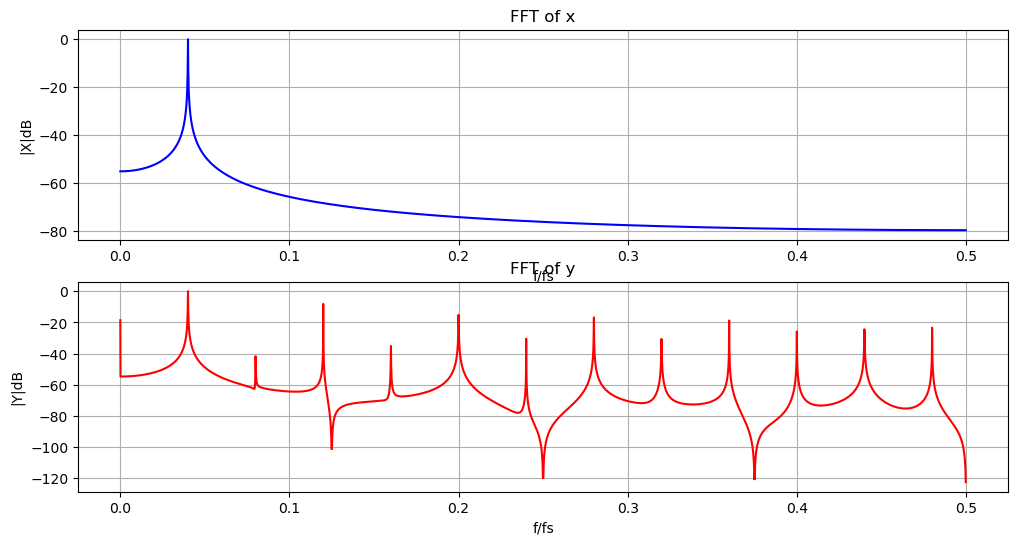

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numbers from the file into a NumPy array
x = np.loadtxt('../data/sinData.txt')
y = np.loadtxt('../data/sinDataOut.txt')

N = len(x)

XdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x))))[N//2:]
YdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y))))[N//2:]

freqs = (np.arange(N) / N - 0.5)[N//2:]

# Plotting
plt.figure(figsize=(12, 6))

# First subplot for XdB
plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
plt.plot(freqs, XdB-np.max(XdB), label='XdB', color='blue')
plt.title('FFT of x')
plt.xlabel('f/fs')
plt.ylabel('|X|dB')
plt.grid()

# Second subplot for YdB
plt.subplot(2, 1, 2)  # 2 rows, 1 column, subplot 2
plt.plot(freqs, YdB-np.max(YdB), label='YdB', color='red')
plt.title('FFT of y')
plt.xlabel('f/fs')
plt.ylabel('|Y|dB')
plt.grid()
plt.show();